In [11]:
#Here you must specify your own path
root = ''

In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

In [13]:
# Dic to get the respective target values of the numbers.
target_dic = {
    0: '(0, 20]constant',
    1: '(20, 40]constant',
    2: '(40, 60]constant',
    3: '(60, 80]constant',
    4: '(80, 100]constant',
    5: '(0, 20]intermittent',
    6: '(20, 40]intermittent',
    7: '(40, 60]intermittent',
    8: '(60, 80]intermittent',
    9: '(80, 100]intermittent',
}

In [14]:
#read in csv file into dataframe
df_train = pd.read_csv(root + 'data/02_processed/completed_train.csv', sep=';')
df_train.pop('Unnamed: 0')

df2=df_train.copy()
df2.drop(['target','4','66'], axis = 1,inplace=True)

#read validation and test data from csv
df_validation = pd.read_csv(root + 'data/02_processed/completed_validation.csv', sep=';')
df_validation.set_index('user_id',inplace=True)
df_test = pd.read_csv(root + 'data/02_processed/completed_test.csv', sep=';')
df_test.set_index('user_id',inplace=True)

#encode target column of test data
target_test=pd.get_dummies(df_test['target'], prefix='target')

# target of train data without encoding
target_train= df_train['target']

#delete target from training data
df_train.pop('target')

# target of train data without encoding
target_test= df_test['target']

#delete target from training data
df_test.pop('target')

train=df_train.copy()
test= df_test.copy()

In [15]:
#Get the categorical and numerical column names
categorical_columns=[]
numerical_columns=[]
for name, values in train.iteritems():
    if values.dtype==np.float64:
        numerical_columns.append(name)
    if values.dtype==object:
        categorical_columns.append(name)

In [16]:
#Encoder to encode categorical variables into integer
categorical_encoder = OrdinalEncoder()

#ColumnTransformer encodes categorical data with the categorical_encoder.
#and numeric columns are not edited.
preprocessing = ColumnTransformer(
    [('cat', categorical_encoder, categorical_columns),
     ('num', 'passthrough', numerical_columns)])


#Classifier
GBM = GradientBoostingClassifier(max_features='sqrt',max_leaf_nodes=8,learning_rate=0.2, n_estimators=200, subsample=1, min_samples_split=20, min_samples_leaf=8,max_depth=6, random_state=0, verbose=3)

#Created Pipeline to combine preprocessing of the data and the classifier.
model = Pipeline([
    ('preprocess', preprocessing),
    ('classifier',GBM)
])

model.fit(train, target_train)

      Iter       Train Loss   Remaining Time 
         1           2.1207            5.36s
         2           1.9636            5.24s
         3           1.8573            5.11s
         4           1.7762            5.08s
         5           1.6840            5.02s
         6           1.6136            5.03s
         7           1.5532            4.92s
         8           1.4977            4.96s
         9           1.4394            5.06s
        10           1.3949            5.02s
        11           1.3470            4.97s
        12           1.3030            4.92s
        13           1.2668            4.89s
        14           1.2311            4.87s
        15           1.1977            4.82s
        16           1.1647            4.82s
        17           1.1354            4.78s
        18           1.1049            4.77s
        19           1.0800            4.76s
        20           1.0581            4.73s
        21           1.0341            4.71s
        2

       186           0.0775            0.37s
       187           0.0765            0.34s
       188           0.0756            0.32s
       189           0.0746            0.29s
       190           0.0738            0.26s
       191           0.0727            0.24s
       192           0.0718            0.21s
       193           0.0710            0.18s
       194           0.0702            0.16s
       195           0.0692            0.13s
       196           0.0682            0.11s
       197           0.0674            0.08s
       198           0.0666            0.05s
       199           0.0657            0.03s
       200           0.0649            0.00s


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['5', '8', '10', '11', '35',
                                                   '37', '40', '68', '70', '71',
                                                   '72', '74', '76', '78', '79',
                                                   '80', '83']),
                                                 ('num', 'passthrough',
                                                  ['4', '66', '67'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=6,
                                            max_features='sqrt',
                                            max_leaf_nodes=8,
                                            min_samples_leaf=8,
                                            min_samples_split=20,
                                            n_estimators=200, random_state=0,
 

In [17]:
#Predictions of the model on the test data
predictions = model.predict(test)

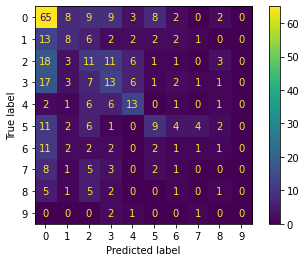

In [18]:
#A confusion matrix  of the predictions of the baseline classifier to see how it performs in detail.
c = confusion_matrix(target_test,predictions)
cm = ConfusionMatrixDisplay(c).plot()


In [19]:
# F1-score measured on test data
f1_score(target_test,predictions,average='macro')

0.20455231443102107

In [20]:
#classification_report
target_names=['(0, 20]constant','(20, 40]constant','(40, 60]constant','(60, 80]constant','(80, 100]constant','(0, 20]intermittent','(20, 40]intermittent','(40, 60]intermittent','(60, 80]intermittent','(80, 100]intermittent',]
print(classification_report(target_test,predictions,digits=3,target_names=target_names,))

                       precision    recall  f1-score   support

      (0, 20]constant      0.433     0.613     0.508       106
     (20, 40]constant      0.276     0.222     0.246        36
     (40, 60]constant      0.193     0.204     0.198        54
     (60, 80]constant      0.255     0.255     0.255        51
    (80, 100]constant      0.419     0.433     0.426        30
  (0, 20]intermittent      0.360     0.231     0.281        39
 (20, 40]intermittent      0.067     0.045     0.054        22
 (40, 60]intermittent      0.000     0.000     0.000        20
 (60, 80]intermittent      0.091     0.067     0.077        15
(80, 100]intermittent      0.000     0.000     0.000         4

             accuracy                          0.321       377
            macro avg      0.209     0.207     0.205       377
         weighted avg      0.288     0.321     0.298       377



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
